<a href="https://colab.research.google.com/github/ZalakPatel14/Rice-Leafs-Disease-Detection-using-ANN/blob/main/Zalak_Patel_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install Keras-Preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 613.4 kB/s eta 0:00:00


In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing dataset
train_data = '/content/drive/MyDrive/RiceLeafsDisease/train'
val_data = '/content/drive/MyDrive/RiceLeafsDisease/validation'

In [ ]:
#  Pre-Processing Data
import os

bacterial_leaf_blight_data = os.path.join(train_data, 'bacterial_leaf_blight')
brown_spot_data = os.path.join(train_data, 'brown_spot')
healthy_data = os.path.join(train_data, 'healthy')
leaf_blast_data = os.path.join(train_data, 'leaf_blast')
leaf_scald_data = os.path.join(train_data, 'leaf_scald')
narrow_brown_spot_data = os.path.join(train_data, 'narrow_brown_spot')

print('total training bacterial_leaf_blight images:', len(os.listdir(bacterial_leaf_blight_data)))
print('total training brown_spot images:', len(os.listdir(brown_spot_data)))
print('total training healthy images:', len(os.listdir(healthy_data)))
print('total training leaf_blast images:', len(os.listdir(leaf_blast_data)))
print('total training leaf_scald images:', len(os.listdir(leaf_scald_data)))
print('total training narrow_brown_spot images:', len(os.listdir(narrow_brown_spot_data)))

total training bacterial_leaf_blight images: 350
total training brown_spot images: 350
total training healthy images: 350
total training leaf_blast images: 350
total training leaf_scald images: 350
total training narrow_brown_spot images: 350


In [ ]:
bacterial_leaf_blight_data = os.path.join(val_data, 'bacterial_leaf_blight')
brown_spot_data = os.path.join(val_data, 'brown_spot')
healthy_data = os.path.join(val_data, 'healthy')
leaf_blast_data = os.path.join(val_data, 'leaf_blast')
leaf_scald_data = os.path.join(val_data, 'leaf_scald')
narrow_brown_spot_data = os.path.join(val_data, 'narrow_brown_spot')

print('total validation bacterial_leaf_blight images:', len(os.listdir(bacterial_leaf_blight_data)))
print('total validation brown_spot images:', len(os.listdir(brown_spot_data)))
print('total validation healthy images:', len(os.listdir(healthy_data)))
print('total validation leaf_blast images:', len(os.listdir(leaf_blast_data)))
print('total validation leaf_scald images:', len(os.listdir(leaf_scald_data)))
print('total validation narrow_brown_spot images:', len(os.listdir(narrow_brown_spot_data)))

total validation bacterial_leaf_blight images: 88
total validation brown_spot images: 88
total validation healthy images: 88
total validation leaf_blast images: 88
total validation leaf_scald images: 88
total validation narrow_brown_spot images: 88


In [ ]:
#listing the classes in train data
classes=[]
for file in os.listdir(train_data):
    classes+=[file]
print(classes)
print(len(classes))

leaf_blast = [train_data + '/leaf_blast/' + img for img in os.listdir(train_data + '/leaf_blast/')[:9]]
healthy = [train_data + '/healthy/' + img for img in os.listdir(train_data + '/healthy/')[:9]]
leaf_scald = [train_data + '/leaf_scald/' + img for img in os.listdir(train_data + '/leaf_scald/')[:9]]
narrow_brown_spot = [train_data + '/narrow_brown_spot/' + img for img in os.listdir(train_data + '/narrow_brown_spot/')[:9]]
brown_spot = [train_data + '/brown_spot/' + img for img in os.listdir(train_data + '/brown_spot/')[:9]]
bacterial_leaf_blight = [train_data + '/bacterial_leaf_blight/' + img for img in os.listdir(train_data + '/bacterial_leaf_blight/')[:9]]

['leaf_blast', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'brown_spot', 'bacterial_leaf_blight']
6


In [ ]:
#listing the classes in val data
classes=[]
for file in os.listdir(train_data):
    classes+=[file]
print(classes)
print(len(classes))

leaf_blast = [val_data + '/leaf_blast/' + img for img in os.listdir(val_data + '/leaf_blast/')[:9]]
healthy = [val_data + '/healthy/' + img for img in os.listdir(val_data + '/healthy/')[:9]]
leaf_scald = [val_data + '/leaf_scald/' + img for img in os.listdir(val_data + '/leaf_scald/')[:9]]
narrow_brown_spot = [val_data + '/narrow_brown_spot/' + img for img in os.listdir(val_data + '/narrow_brown_spot/')[:9]]
brown_spot = [val_data + '/brown_spot/' + img for img in os.listdir(val_data + '/brown_spot/')[:9]]
bacterial_leaf_blight = [val_data + '/bacterial_leaf_blight/' + img for img in os.listdir(val_data + '/bacterial_leaf_blight/')[:9]]

['leaf_blast', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'brown_spot', 'bacterial_leaf_blight']
6


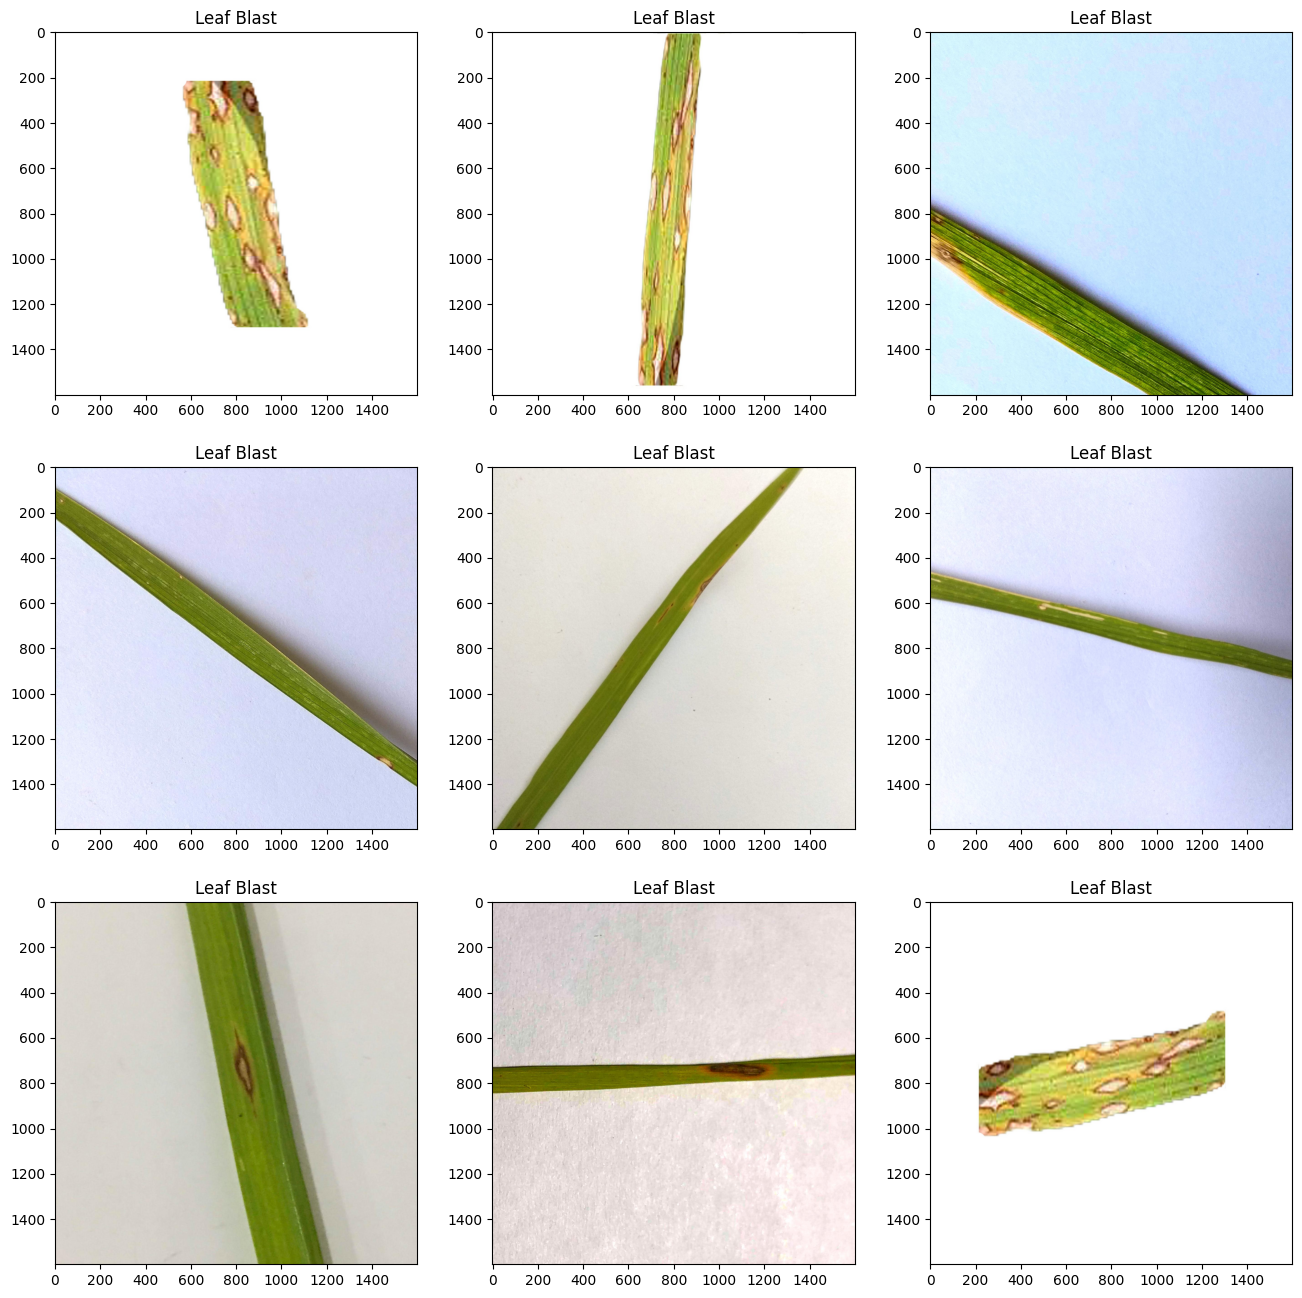

In [ ]:
# leafblast data display
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(leaf_blast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

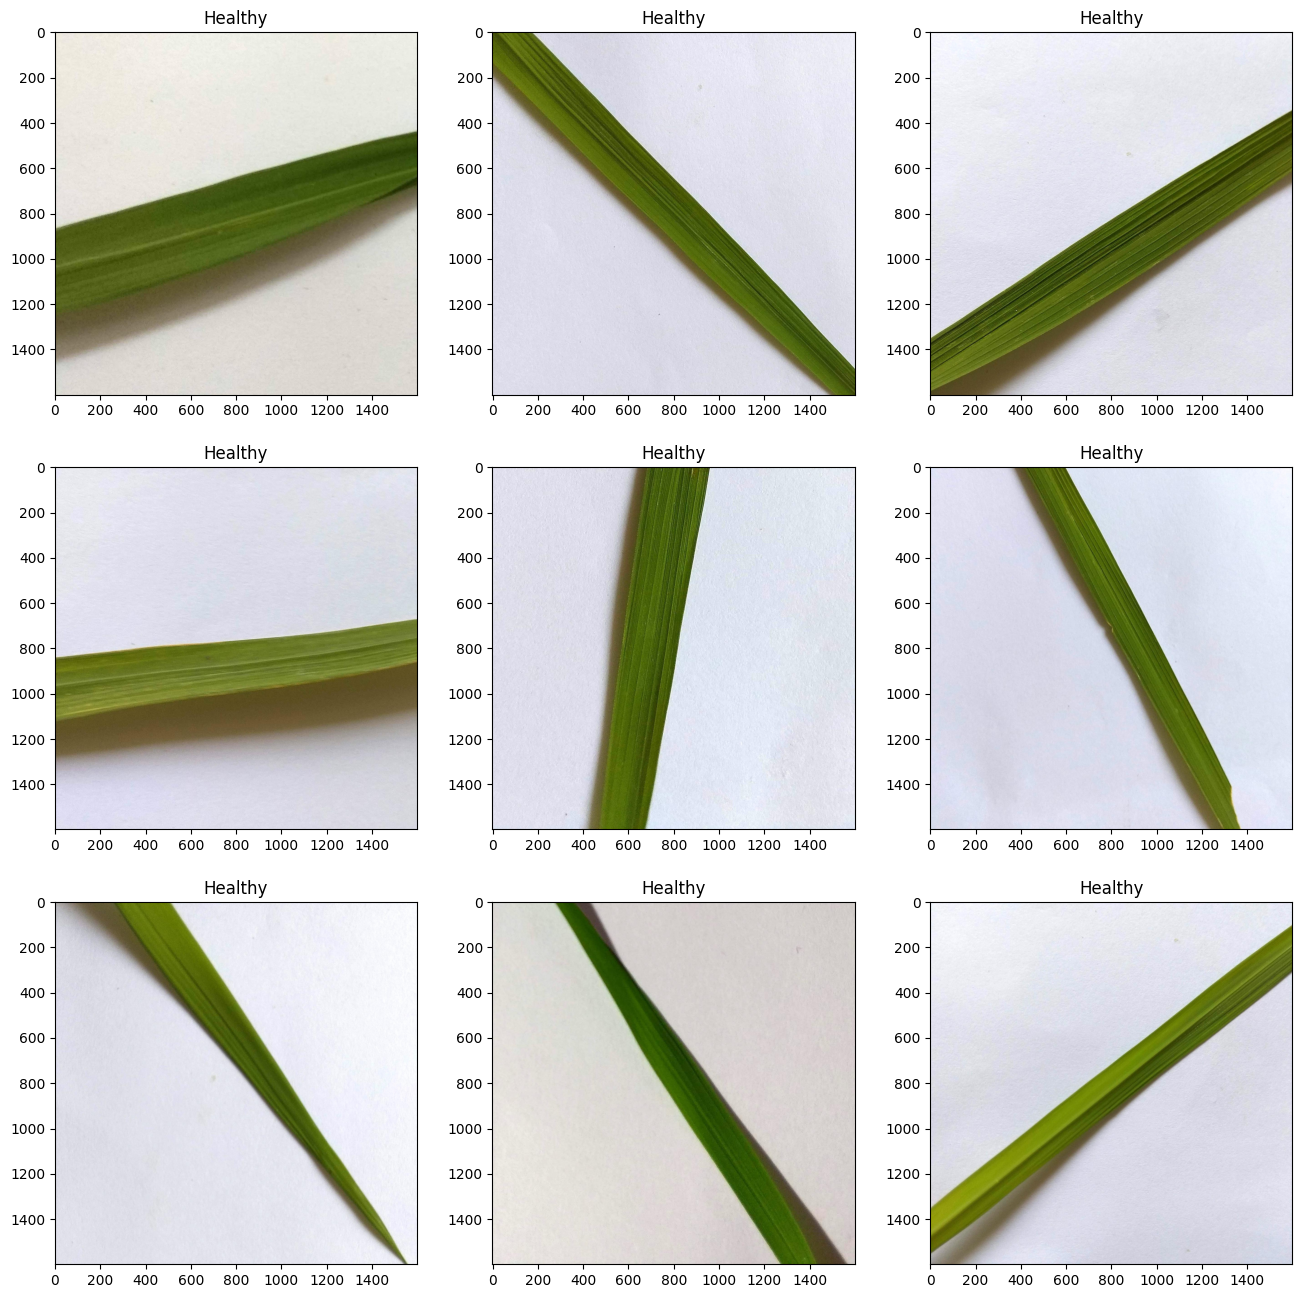

In [ ]:
# Healthy data display
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

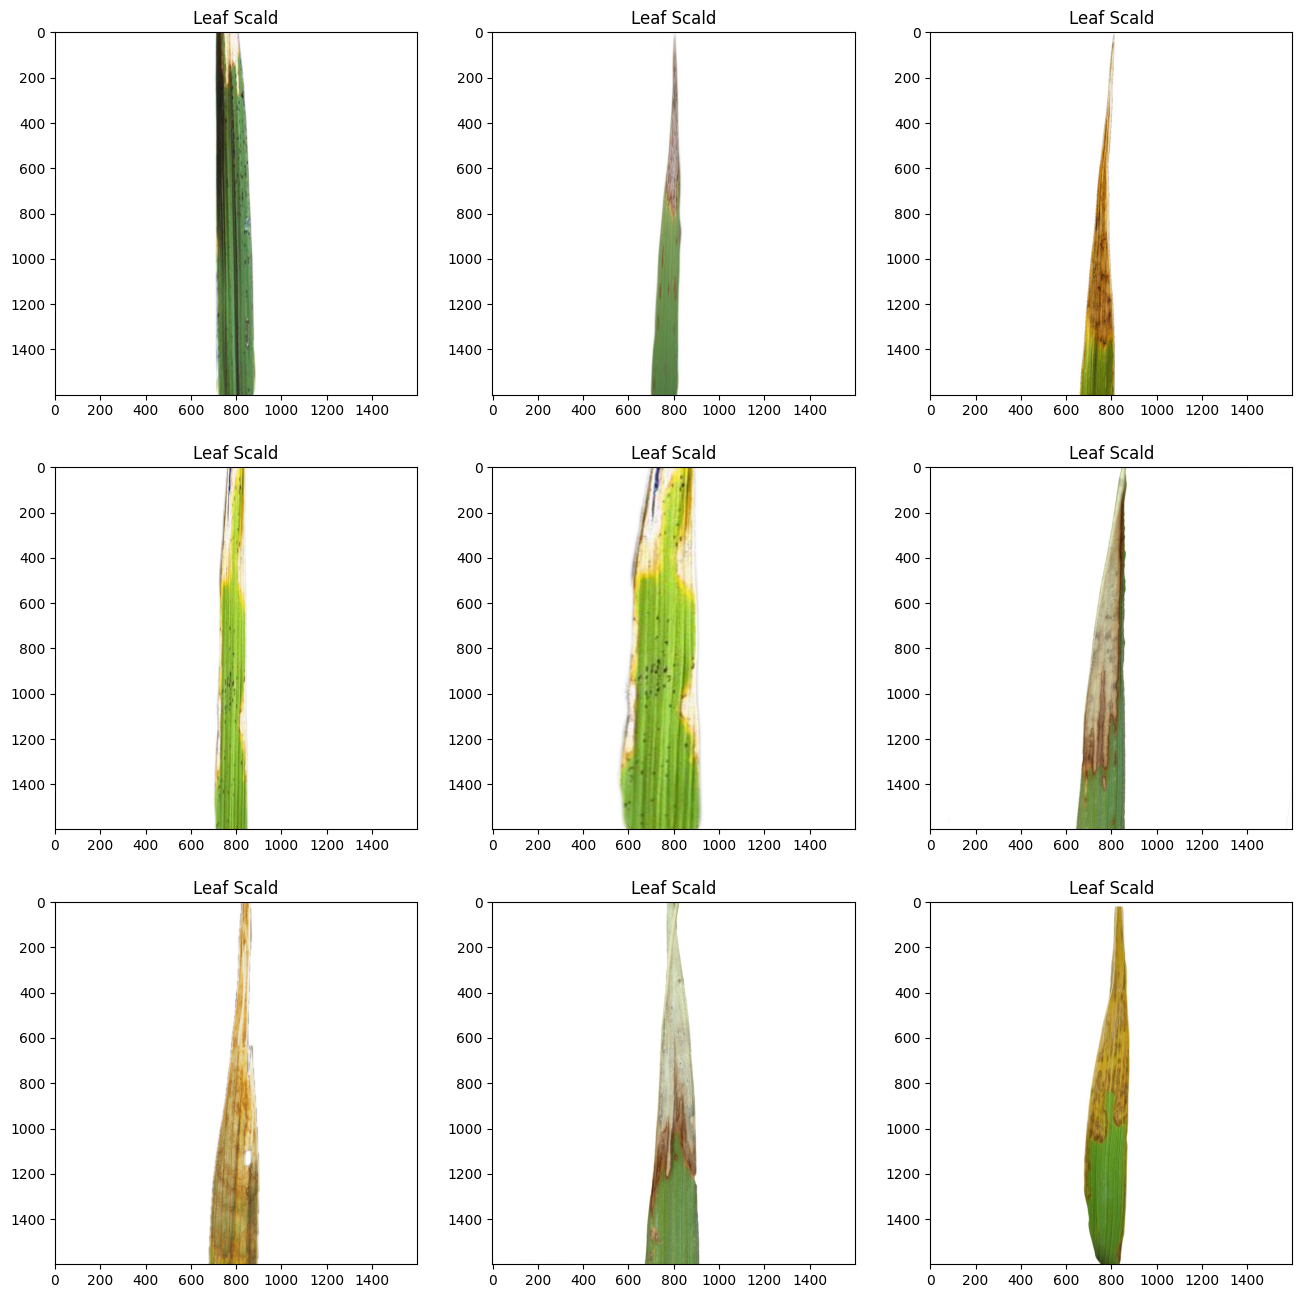

In [ ]:
# leaf Scald data display
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(leaf_scald):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Scald")

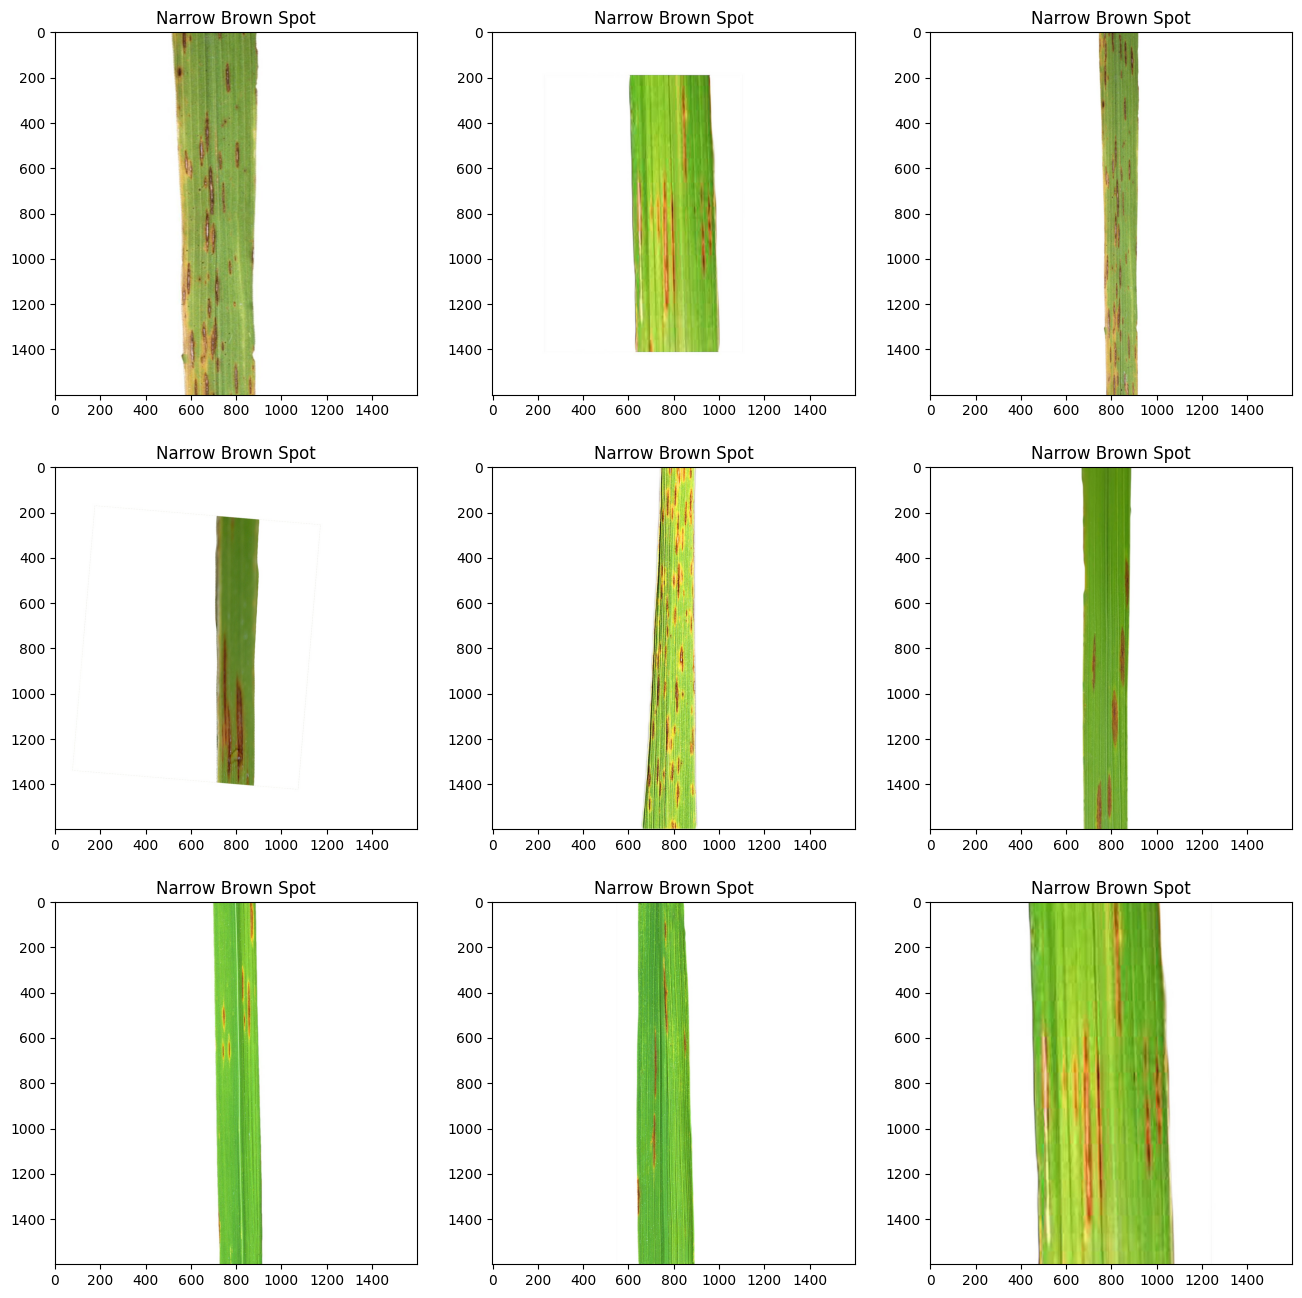

In [ ]:
# Narrow Brown Spot data display
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(narrow_brown_spot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Narrow Brown Spot")

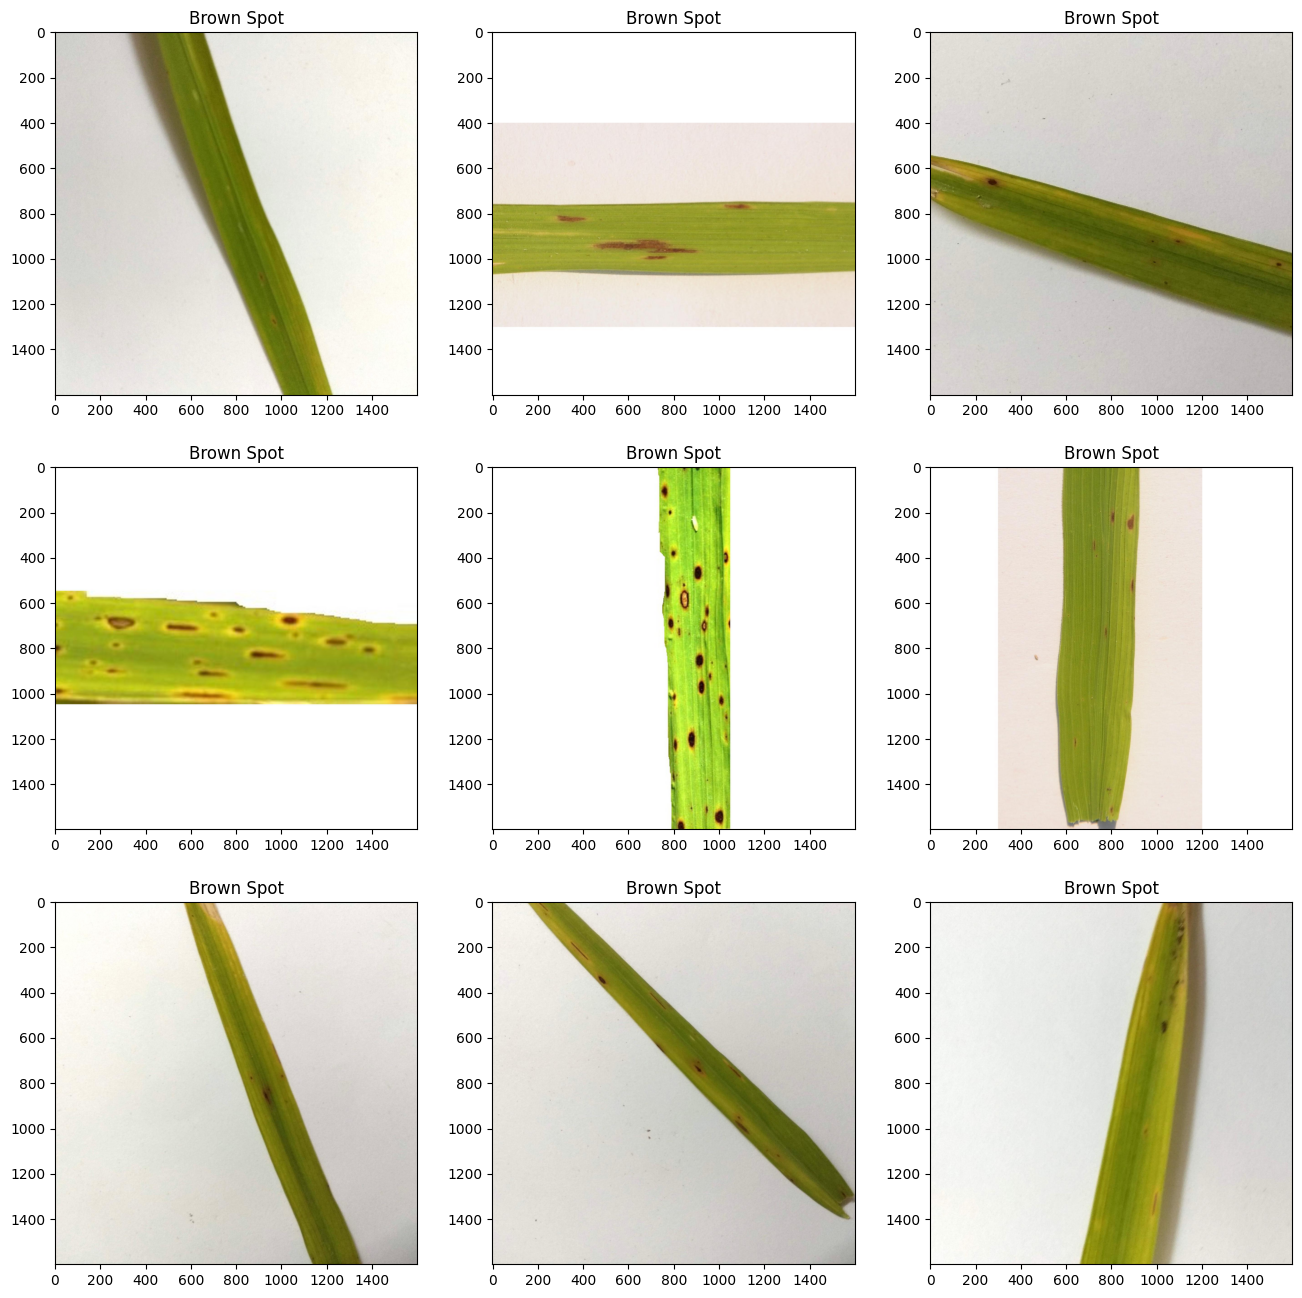

In [ ]:
# Brown Spot data display
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brown_spot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

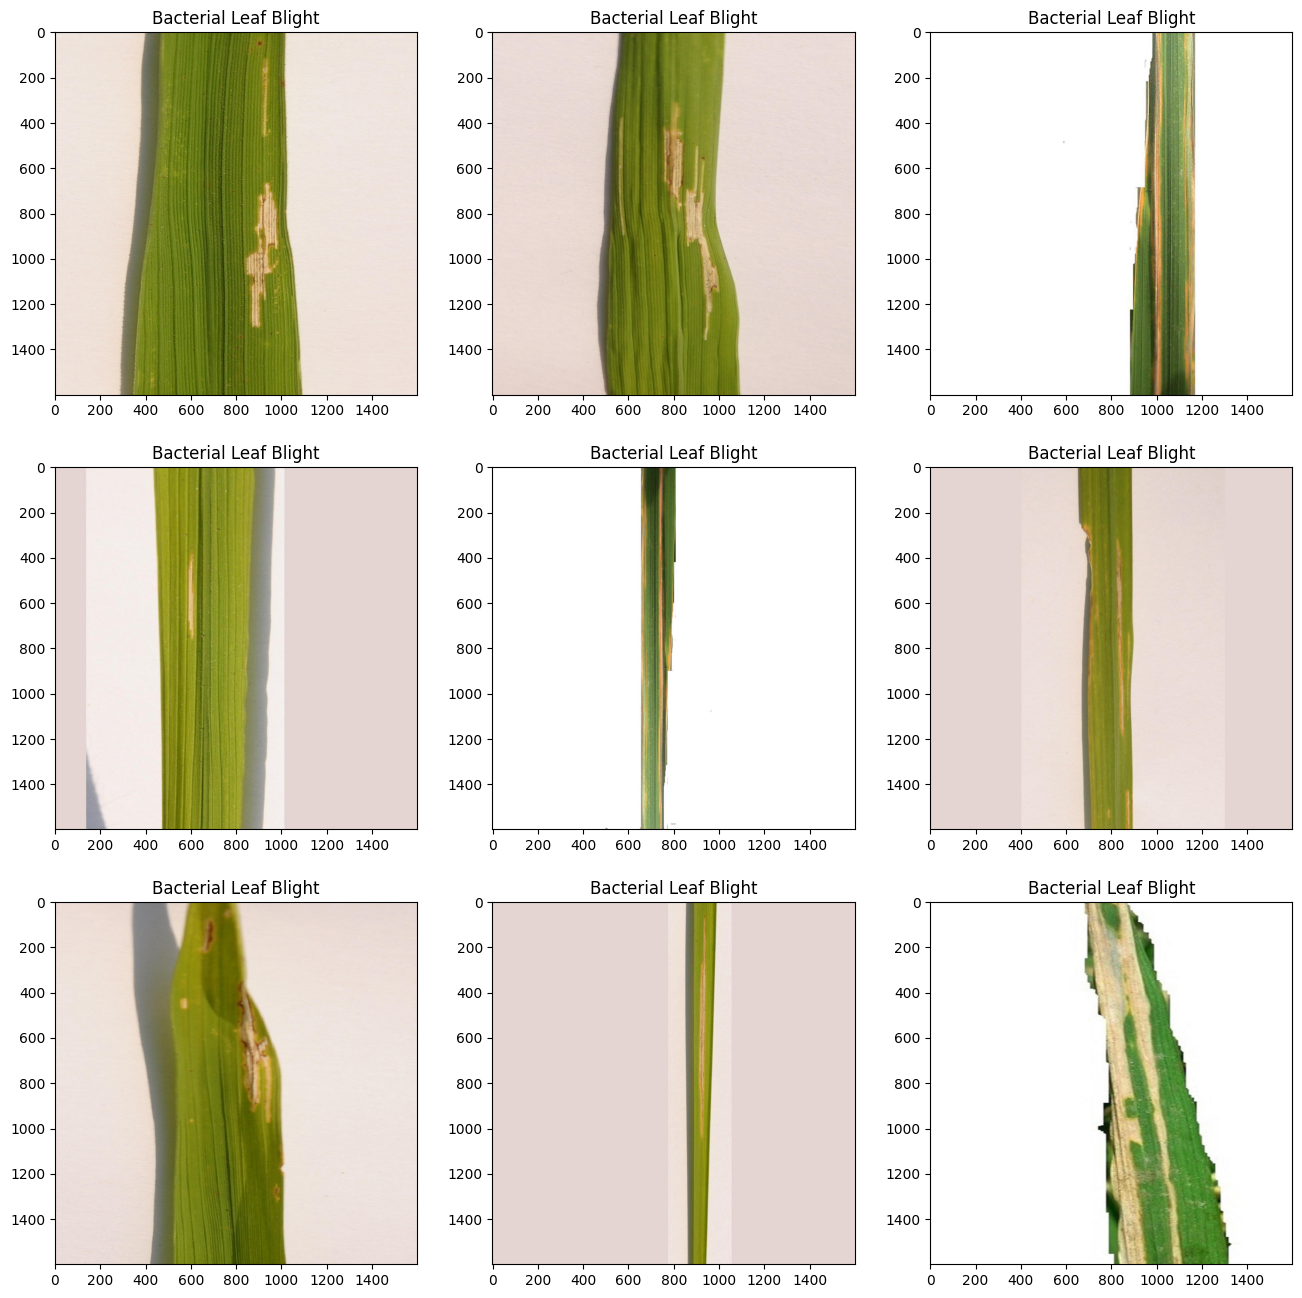

In [ ]:
# Bacterial Leaf Blight data display
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(bacterial_leaf_blight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Bacterial Leaf Blight")

In [ ]:
# Image Data Augmentation and Generators for Neural Network Training
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_data
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True)

VALIDATION_DIR = val_data
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 2100 images belonging to 6 classes.
Found 528 images belonging to 6 classes.


In [ ]:
# Model Building
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [ ]:
# Set the training parameters
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Training Model
initial_epoch = 40

his = model.fit(train_generator, callbacks=Call_Back, epochs=initial_epoch, validation_data = validation_generator)

Epoch 1/40
66/66 [==============================] - 903s 14s/step - loss: 2.4374 - accuracy: 0.2914 - val_loss: 1.9165 - val_accuracy: 0.4394
Epoch 2/40
66/66 [==============================] - 499s 8s/step - loss: 1.7385 - accuracy: 0.5014 - val_loss: 1.4035 - val_accuracy: 0.6496
Epoch 3/40
66/66 [==============================] - 496s 7s/step - loss: 1.3847 - accuracy: 0.6048 - val_loss: 1.2313 - val_accuracy: 0.6591
Epoch 4/40
66/66 [==============================] - 494s 7s/step - loss: 1.1964 - accuracy: 0.6871 - val_loss: 1.0714 - val_accuracy: 0.7386
Epoch 5/40
66/66 [==============================] - 491s 7s/step - loss: 1.0800 - accuracy: 0.7062 - val_loss: 1.0141 - val_accuracy: 0.7254
Epoch 6/40
66/66 [==============================] - 496s 7s/step - loss: 1.0222 - accuracy: 0.7214 - val_loss: 0.9442 - val_accuracy: 0.7557
Epoch 7/40
66/66 [==============================] - 491s 7s/step - loss: 0.9464 - accuracy: 0.7419 - val_loss: 0.9577 - val_accuracy: 0.7273
Epoch 8/40
6

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

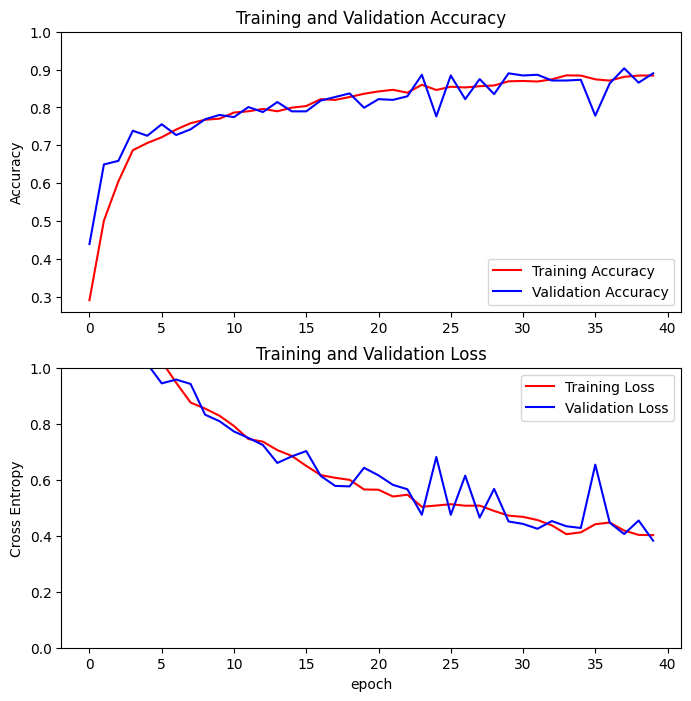

In [ ]:
# Model Prediction
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']

loss = his.history['loss']
val_loss = his.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, 'r', label='Training Accuracy')
plt.plot(val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, 'r', label='Training Loss')
plt.plot(val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Calculate accuracy and loss in percentage
train_accuracy_percentage = his.history['accuracy'][-1] * 100
train_loss_percentage = his.history['loss'][-1] * 100
val_accuracy_percentage = his.history['val_accuracy'][-1] * 100
val_loss_percentage = his.history['val_loss'][-1] * 100

# Print accuracy and loss in percentage
print("Final Training Accuracy: {:.2f}%".format(train_accuracy_percentage))
print("Final Training Loss: {:.2f}%".format(train_loss_percentage))
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy_percentage))
print("Final Validation Loss: {:.2f}%".format(val_loss_percentage))

Final Training Accuracy: 88.43%
Final Training Loss: 40.21%
Final Validation Accuracy: 89.02%
Final Validation Loss: 38.24%


In [ ]:
# Fine Tuning
fine_tune_epochs = 20
total_epochs =  initial_epoch + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=his.epoch[-1],
                         validation_data=validation_generator)

Epoch 40/60
66/66 [==============================] - 447s 7s/step - loss: 0.3639 - accuracy: 0.9014 - val_loss: 0.4757 - val_accuracy: 0.8466
Epoch 41/60
66/66 [==============================] - 451s 7s/step - loss: 0.3871 - accuracy: 0.8738 - val_loss: 0.4082 - val_accuracy: 0.8750
Epoch 42/60
66/66 [==============================] - 445s 7s/step - loss: 0.3678 - accuracy: 0.8943 - val_loss: 0.4334 - val_accuracy: 0.8466
Epoch 43/60
66/66 [==============================] - 442s 7s/step - loss: 0.3828 - accuracy: 0.8876 - val_loss: 0.5617 - val_accuracy: 0.8068
Epoch 44/60
66/66 [==============================] - 451s 7s/step - loss: 0.3915 - accuracy: 0.8852 - val_loss: 0.5645 - val_accuracy: 0.8333
Epoch 45/60
66/66 [==============================] - 454s 7s/step - loss: 0.3651 - accuracy: 0.8986 - val_loss: 0.3860 - val_accuracy: 0.8883
Epoch 46/60
66/66 [==============================] - 458s 7s/step - loss: 0.3512 - accuracy: 0.8990 - val_loss: 0.3725 - val_accuracy: 0.8807
Epoch 

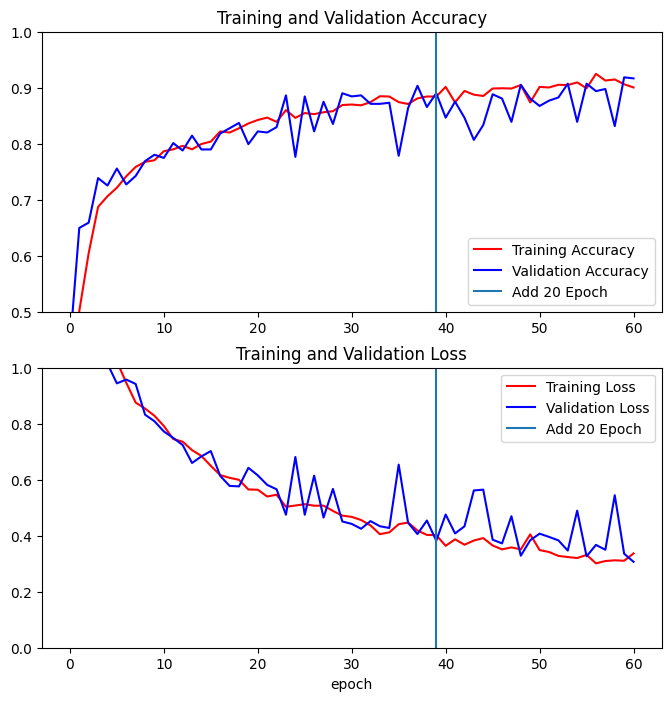

In [ ]:
# training and validation accuracy Plot after Fine-tuning
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, 'r', label='Training Accuracy')
plt.plot(val_acc, 'b', label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([initial_epoch-1,initial_epoch-1],
          plt.ylim(), label='Add 20 Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, 'r', label='Training Loss')
plt.plot(val_loss, 'b', label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epoch-1,initial_epoch-1],
         plt.ylim(), label='Add 20 Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Calculate accuracy and loss in percentage after fine tuning
train_accuracy_percentage = his.history['accuracy'][-1] * 100
train_loss_percentage = his.history['loss'][-1] * 100
val_accuracy_percentage = his.history['val_accuracy'][-1] * 100
val_loss_percentage = his.history['val_loss'][-1] * 100

# Print accuracy and loss in percentage
print("Final Training Accuracy: {:.2f}%".format(train_accuracy_percentage))
print("Final Training Loss: {:.2f}%".format(train_loss_percentage))
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy_percentage))
print("Final Validation Loss: {:.2f}%".format(val_loss_percentage))

Final Training Accuracy: 90.05%
Final Training Loss: 33.67%
Final Validation Accuracy: 91.67%
Final Validation Loss: 30.69%


In [ ]:
# importing test data in google colab
test_data = '/content/drive/MyDrive/RiceLeafsDisease/test'

1/1 [==============================] - 0s 73ms/step


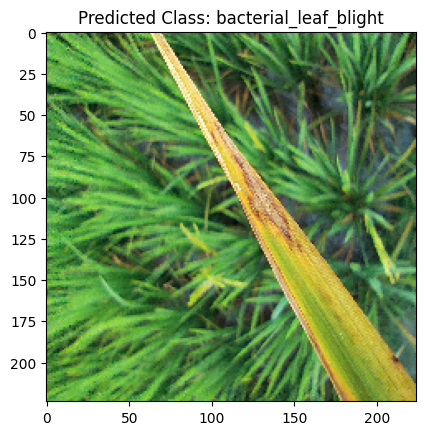

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Prediction from another source
image_path = "/content/drive/MyDrive/RiceLeafsDisease/test/Bacterial Leaf Blight/IMG_20231014_172907.jpg"

img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
predictions = model.predict(x)
class_names = ['leaf_blast', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'brown_spot', 'bacterial_leaf_blight']
predicted_class = class_names[np.argmax(predictions)]

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

1/1 [==============================] - 0s 62ms/step


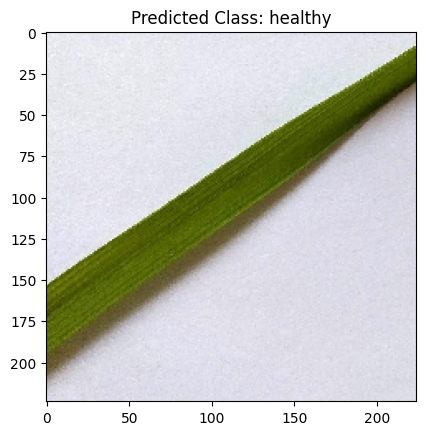

In [ ]:
# Prediction from another source
image_path = "/content/drive/MyDrive/RiceLeafsDisease/test/Healthy Rice Leaf/healthy (10).jpg"

img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
predictions = model.predict(x)
class_names = ['leaf_blast', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'brown_spot', 'bacterial_leaf_blight']
predicted_class = class_names[np.argmax(predictions)]

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

1/1 [==============================] - 0s 61ms/step


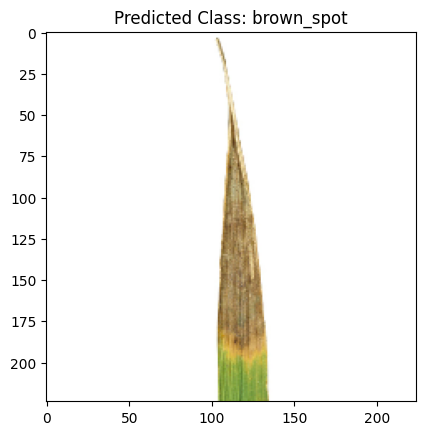

In [ ]:
# Prediction from another source
image_path = "/content/drive/MyDrive/RiceLeafsDisease/test/Brown Spot/Brown_Spot (6).jpg"

img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
predictions = model.predict(x)
class_names = ['leaf_blast', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'brown_spot', 'bacterial_leaf_blight']
predicted_class = class_names[np.argmax(predictions)]

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()